# Proyek Analisis Data: Nama dataset
- Nama:Gugum Gumilar
- Email:goem75@gmail.com
- Id Dicoding:gugum75

## Menentukan Pertanyaan Bisnis

- pertanyaan 1 :  Bagaimana faktor-faktor seperti cuaca, suhu, dan waktu mempengaruhi jumlah sewa sepeda pada sistem berbagi sepeda?
- pertanyaan 2 : Berapa perbandingan pengguna casual dan yang terdaftar pada saat hari libur dan hari kerja?

## Menyaipkan semua library yang dibuthkan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn


## Data Wrangling

### Gathering Data

In [2]:
day_df = pd.read_csv("day.csv")
day_df.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
hour_df = pd.read_csv("hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

Menilai tabel day_df

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [6]:
print("jumlah duplikasi : ", day_df.duplicated().sum())

jumlah duplikasi :  0


Menilai tabel hour_df

In [7]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [8]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [9]:
print("jumlah duplikasi: ", hour_df.duplicated().sum())

jumlah duplikasi:  0


### Cleaning Data

Merubah tipe data kolom 'dteday' menjadi tanggal pada tabel day_df

In [10]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

###### Ubah tipe data beberapa kolom menjadi kategori pada day_df

In [11]:
categorical_columns = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

day_df[categorical_columns] = day_df[categorical_columns].astype('category')


In [12]:
# periksa data setelah perubahan
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   yr          731 non-null    category      
 4   mnth        731 non-null    category      
 5   holiday     731 non-null    category      
 6   weekday     731 non-null    category      
 7   workingday  731 non-null    category      
 8   weathersit  731 non-null    category      
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: category(7), datetime64

###### Menambahkan kolom baru 'weekend' pada day_df
kolom ini adalah untuk mengetahui pengguna pada hari sabtu dan minggu

In [13]:
# Menambahkan kolom 'weekend'
day_df['weekend'] = (day_df['holiday'] == 0) & (day_df['workingday'] == 0)
# Mengonversi nilai True/False menjadi 1/0
day_df['weekend'] = day_df['weekend'].astype(int)

# Menampilkan dataset dengan kolom baru
print(day_df.head())


   instant     dteday season yr mnth holiday weekday workingday weathersit  \
0        1 2011-01-01      1  0    1       0       6          0          2   
1        2 2011-01-02      1  0    1       0       0          0          2   
2        3 2011-01-03      1  0    1       0       1          1          1   
3        4 2011-01-04      1  0    1       0       2          1          1   
4        5 2011-01-05      1  0    1       0       3          1          1   

       temp     atemp       hum  windspeed  casual  registered   cnt  weekend  
0  0.344167  0.363625  0.805833   0.160446     331         654   985        1  
1  0.363478  0.353739  0.696087   0.248539     131         670   801        1  
2  0.196364  0.189405  0.437273   0.248309     120        1229  1349        0  
3  0.200000  0.212122  0.590435   0.160296     108        1454  1562        0  
4  0.226957  0.229270  0.436957   0.186900      82        1518  1600        0  


#### Ubah tipe data beberapa kolom menjadi kategori pada day_df

In [14]:
categorical_columns = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'weekend']

day_df[categorical_columns] = day_df[categorical_columns].astype('category')

# Menampilkan dataset setelah perubahan
day_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   yr          731 non-null    category      
 4   mnth        731 non-null    category      
 5   holiday     731 non-null    category      
 6   weekday     731 non-null    category      
 7   workingday  731 non-null    category      
 8   weathersit  731 non-null    category      
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
 16  weekend     731 non-null  

#### Merubah tipe data kolom 'dteday' menjadi tanggal pada tabel hour_df

In [15]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])


In [16]:
categorical_columns = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

hour_df[categorical_columns] = day_df[categorical_columns].astype('category')


In [17]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      731 non-null    category      
 3   yr          731 non-null    category      
 4   mnth        731 non-null    category      
 5   hr          17379 non-null  int64         
 6   holiday     731 non-null    category      
 7   weekday     731 non-null    category      
 8   workingday  731 non-null    category      
 9   weathersit  731 non-null    category      
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

#### Menambahkan kolom baru 'weekend' pada day_df

kolom ini adalah untuk mengetahui pengguna pada hari sabtu dan minggu


In [18]:
# Menambahkan kolom 'weekend'
hour_df['weekend'] = (hour_df['holiday'] == 0) & (hour_df['workingday'] == 0)
# Mengonversi nilai True/False menjadi 1/0
hour_df['weekend'] = hour_df['weekend'].astype(int)

# Menampilkan dataset dengan kolom baru
print(hour_df.head())

   instant     dteday season yr mnth  hr holiday weekday workingday  \
0        1 2011-01-01      1  0    1   0       0       6          0   
1        2 2011-01-01      1  0    1   1       0       0          0   
2        3 2011-01-01      1  0    1   2       0       1          1   
3        4 2011-01-01      1  0    1   3       0       2          1   
4        5 2011-01-01      1  0    1   4       0       3          1   

  weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  weekend  
0          2  0.24  0.2879  0.81        0.0       3          13   16        1  
1          2  0.22  0.2727  0.80        0.0       8          32   40        1  
2          1  0.22  0.2727  0.80        0.0       5          27   32        0  
3          1  0.24  0.2879  0.75        0.0       3          10   13        0  
4          1  0.24  0.2879  0.75        0.0       0           1    1        0  


###### Ubah tipe data beberapa kolom menjadi kategori pada hour_df

In [19]:
hour_df[categorical_columns] = hour_df[categorical_columns].astype('category')

In [20]:
# periksa data setelah perubahan
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      731 non-null    category      
 3   yr          731 non-null    category      
 4   mnth        731 non-null    category      
 5   hr          17379 non-null  int64         
 6   holiday     731 non-null    category      
 7   weekday     731 non-null    category      
 8   workingday  731 non-null    category      
 9   weathersit  731 non-null    category      
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

## Exploratory Data Analysis (EDA)

mencari data pelanggan terregis dan tidak aktifitas mereka lebih banyak pada hari apa, pada musim apa
penyewaan terendah terjadi pada hari apa? musim apa? cuaca apa?

### Explore day_df

In [21]:
day_df.describe(include='all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,weekend
count,731.000000,731,731.0,731.0,731.0,731.0,731.0,731.0,731.0,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.0
unique,NaN,731,4.0,2.0,12.0,2.0,7.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
top,NaN,2012-02-14 00:00:00,3.0,1.0,12.0,0.0,6.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
freq,NaN,1,188.0,366.0,62.0,710.0,105.0,500.0,463.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,521.0
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837,NaN
std,211.165812,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000,NaN
25%,183.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000,NaN


In [22]:
# Filter data untuk hari libur
day_holiday_df = day_df[day_df['holiday'] == 1]

# Filter data untuk hari kerja
day_workingday_df = day_df[day_df['workingday'] == 1]

# Filter data untuk weekend
day_weekend_df = day_df[day_df['weekend'] == 1]



In [23]:
# Hitung jumlah pengguna casual dan terdaftar pada hari libur
sum_casual_day_holiday_df = day_holiday_df['casual'].sum()
sum_regist_day_holiday_df = day_holiday_df['registered'].sum()

# Hitung jumlah pengguna casual dan terdaftar pada hari kerja
sum_casual_day_workingday_df = day_workingday_df['casual'].sum()
sum_regist_day_workingday_df = day_workingday_df['registered'].sum()

# Hitung jumlah pengguna casual dan terdaftar pada weekend
sum_casual_day_weekend_df = day_weekend_df['casual'].sum()
sum_regist_day_weekend_df = day_weekend_df['registered'].sum()


# Tampilkan hasil
print(f"Jumlah Casual pada Hari Libur: {sum_casual_day_holiday_df}")
print(f"Jumlah Terdaftar pada Hari Libur: {sum_regist_day_holiday_df}")
print(f"Jumlah Casual pada Hari Kerja: {sum_casual_day_workingday_df}")
print(f"Jumlah Terdaftar pada Hari Kerja: {sum_regist_day_workingday_df}")
print(f"Jumlah Casual pada Weekend: {sum_casual_day_weekend_df}")
print(f"Jumlah Terdaftar pada Weekend: {sum_regist_day_weekend_df}")


Jumlah Casual pada Hari Libur: 22359
Jumlah Terdaftar pada Hari Libur: 56076
Jumlah Casual pada Hari Kerja: 303285
Jumlah Terdaftar pada Hari Kerja: 1989125
Jumlah Casual pada Weekend: 294373
Jumlah Terdaftar pada Weekend: 627461


In [24]:
#Distribusi pengguna casual berdasarkan hari
day_df.groupby(by='weekday').agg({
        'casual':['max', 'min', 'mean', 'sum', 'std']    
        
})

casual                                     
           max min         mean     sum         std
weekday                                            
0         3283  54  1338.295238  140521  809.324777
1         3065   2   674.133333   70784  493.777298
2         1348   9   556.182692   57843  342.748705
3         2562   9   551.144231   57319  401.808954
4         1405  15   590.961538   61460  371.680307
5         2469  38   752.288462   78238  483.422400
6         3410  57  1465.257143  153852  927.082884

In [25]:
#Distribusi pengguna terdaftar berdasarkan hari
day_df.groupby(by='weekday').agg({
        'registered':['max', 'min', 'mean', 'sum', 'std']
})

registered                                        
               max   min         mean     sum          std
weekday                                                   
0             5657   451  2890.533333  303506  1179.713036
1             6435    20  3663.990476  384719  1504.215925
2             6697   573  3954.480769  411266  1549.462149
3             6946   432  3997.394231  415729  1723.710208
4             6781   416  4076.298077  423935  1642.753330
5             6917  1129  3938.000000  409552  1494.998698
6             5966   570  3085.285714  323955  1358.068784

In [26]:
#distribusi total pengguna berdasarkan hari
day_df.groupby(by='weekday').agg({
        'cnt':['max', 'min', 'mean', 'sum', 'std']    
        
})

cnt                                        
          max   min         mean     sum          std
weekday                                              
0        8227   605  4228.828571  444027  1872.496629
1        7525    22  4338.123810  455503  1793.074013
2        7767   683  4510.663462  469109  1826.911642
3        8173   441  4548.538462  473048  2038.095884
4        7804   431  4667.259615  485395  1939.433317
5        8362  1167  4690.288462  487790  1874.624870
6        8714   627  4550.542857  477807  2196.693009

distribusi total pengguna sepeda akan meningkat pada weekend begitu pula untuk pengguna casual jumlah pengguna akan lebih tinggi pada weekend daripada workingday, tapi untuk pengguna terdaftar distribusinya akan lebih tinggi pada saat workingday dan menurun pada saat weekend

#### Distribusi penyewaan sepeda berdasarkan cuaca
1: Cerah, Sebagian berawan
2: Kabut + Berawan
3: Salju Ringan, Hujan Ringan + Badai Petir + Awan Tersebar, Hujan Ringan + Awan Tersebar
4: Hujan Lebat + Pecahan Es + Badai Petir + Kabut, Salju + Kabut


In [27]:
day_df.groupby(by='weathersit').agg({
    'cnt':['max', 'min', 'mean', 'sum', 'std']
})

cnt                                        
             max  min         mean      sum          std
weathersit                                              
1           8714  431  4876.786177  2257952  1879.483989
2           8362  605  4035.862348   996858  1809.109918
3           4639   22  1803.285714    37869  1240.284449

#### Distribusi penyewaan sepeda berdasarkan musim
1: musim semi, 2: musim panas, 3: musim gugur, 4: musim dingin

In [28]:
#distribusi total pengguna berdasarkan musim
day_df.groupby(by='season').agg({
    'cnt':['max', 'min', 'mean', 'sum', 'std']
})

cnt                                         
         max   min         mean      sum          std
season                                               
1       7836   431  2604.132597   471348  1399.942119
2       8362   795  4992.331522   918589  1695.977235
3       8714  1115  5644.303191  1061129  1459.800381
4       8555    22  4728.162921   841613  1699.615261

In [29]:
#distribusi suhu berdasarkan musim
day_temp_season_df = day_df.groupby(by='season').agg({
    'temp':['max', 'min', 'mean', 'std'],
    'cnt':['sum']
})
print(day_temp_season_df)

            temp                                    cnt
             max       min      mean       std      sum
season                                                 
1       0.572500  0.059130  0.297748  0.102735   471348
2       0.808333  0.253043  0.544405  0.122650   918589
3       0.861667  0.469167  0.706309  0.070848  1061129
4       0.657500  0.220833  0.422906  0.107834   841613


In [30]:
# Membuat pivot table distribusi cuaca pada setiap musim
day_weathersit_season_df = day_df.pivot_table(values='instant', index='weathersit', columns='season', aggfunc='count')

# Menampilkan pivot table
print(day_weathersit_season_df)

season        1    2    3    4
weathersit                    
1           111  113  136  103
2            66   68   48   65
3             4    3    4   10


cuaca cerah lebih sering terjadi sepanjang musim gugur, begitupula jumlah pengguna yg lebih banyak pada musim gugur, menandakan orang lebih senang bersepada saat cuaca cerah

### Explore hour_df

In [31]:
hour_df.describe(include='all')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,weekend
count,17379.0000,17379,731.0,731.0,731.0,17379.000000,731.0,731.0,731.0,731.0,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,4.0,2.0,12.0,NaN,2.0,7.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2012-08-29 00:00:00,3.0,1.0,12.0,NaN,0.0,6.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,188.0,366.0,62.0,NaN,710.0,105.0,500.0,463.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,NaN,NaN,NaN,11.546752,NaN,NaN,NaN,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088,0.012084
std,5017.0295,NaN,NaN,NaN,NaN,6.914405,NaN,NaN,NaN,NaN,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599,0.109262
min,1.0000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,4345.5000,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000,0.000000


In [32]:
#Distribusi pengguna sepeda berdasarkan jam untuk setiap harinya

# Melakukan groupby
weekday_hour_df = hour_df.groupby(['hr', 'weekday'])['cnt'].sum()

# Mengubah hasil groupby menjadi pivot table
pvt_weekday_hour_df = weekday_hour_df.unstack()

# Menampilkan pivot table
print(pvt_weekday_hour_df)


weekday    0    1    2    3    4    5    6
hr                                        
0         23   88   73   72   83   17   92
1         71   22   58   51   44   45   10
2          5   53   10   37   34   29   35
3         20    4   23    2   18   17   13
4          8    3    6    5    6    9    8
5          4   23    6   28   20   25    6
6         51   31  116   37  116   91  113
7        322  144   73  308   97  363  267
8        652  765  349  176  835  197  865
9        526  445  531  273  145  567  132
10       121  233  271  300  238  157  277
11       323  150  207  258  327  305  159
12       241  375  182  276  396  444  384
13       374  220  416  215  298  392  430
14       426  358  271  346  154  308  388
15       358  480  411  263  355  178  290
16       461  431  541  409  291  448  182
17       317  956  623  896  413  296  893
18       787  249  845  474  851  354  270
19       206  566  173  592  346  567  275
20       177  123  335  111  446  238  401
21       28

In [33]:

pvt_weekday_hour_df.describe()


weekday,0,1,2,3,4,5,6
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,252.375000,260.250000,244.916667,228.833333,241.875000,229.375000,245.083333
std,213.224685,247.610713,222.408929,212.107575,232.511302,178.610047,237.184924
min,4.000000,3.000000,6.000000,2.000000,6.000000,9.000000,6.000000
25%,66.000000,79.250000,73.000000,54.750000,68.000000,53.250000,77.750000
50%,223.500000,197.500000,177.500000,207.000000,165.500000,217.500000,185.000000
75%,362.000000,389.000000,364.500000,302.000000,348.250000,356.250000,313.500000
max,787.000000,956.000000,845.000000,896.000000,851.000000,567.000000,893.000000


In [34]:
# menampilkan 4 rata-rata jumlah peminjaman tertingga sepeda pada tiap harinya berdasarkan jam
# Membaca dataset
hour_df = pd.read_csv('hour.csv')

# Mengelompokkan berdasarkan 'weekday' dan 'hr' dan menghitung rata-rata penggunaan sepeda
rata_rata_penggunaan_df = hour_df.groupby(['weekday', 'hr'])['cnt'].mean()

# Mengambil 4 jam tertinggi setiap harinya
jam_tertinggi_df = rata_rata_penggunaan_df.groupby('weekday', group_keys=False, sort=False).nlargest(4).reset_index()

# Menampilkan hasil
print(jam_tertinggi_df)



    weekday  hr         cnt
0         0  13  374.933333
1         0  12  372.961905
2         0  14  363.628571
3         0  16  355.400000
4         1  17  502.394231
5         1  18  481.346154
6         1   8  412.192308
7         1  19  344.576923
8         2  17  544.278846
9         2  18  517.567308
10        2   8  471.784314
11        2  19  353.923077
12        3  17  513.144231
13        3  18  494.029126
14        3   8  488.326923
15        3  19  357.504854
16        4  17  527.346154
17        4  18  502.096154
18        4   8  488.572816
19        4  19  358.451923
20        5  17  492.413462
21        5   8  462.278846
22        5  18  420.990385
23        5  16  330.990385
24        6  13  385.371429
25        6  15  382.428571
26        6  14  381.333333
27        6  12  375.380952


## Visualization & Explanatory Analysis

### Pertanyaan 1:Bagaimana distribusi jumlah peminjaman sepeda berdasarkan cuaca, suhu, hari?

In [35]:
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,weekend
598,599,2012-08-21,3,1,8,0,2,1,1,0.649167,0.601025,0.673750,0.072771,1081,5925,7006,0
49,50,2011-02-19,1,0,2,0,6,0,1,0.399167,0.391404,0.187917,0.507463,532,1103,1635,1
169,170,2011-06-19,2,0,6,0,0,0,2,0.699167,0.645846,0.666667,0.102000,1639,3105,4744,1
48,49,2011-02-18,1,0,2,0,5,1,1,0.521667,0.511983,0.516667,0.264925,579,2348,2927,0
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,0


In [36]:
# Mengelompokkan data berdasarkan cuaca dan menghitung total peminjaman
weathersit_df = day_df.groupby('weathersit')['cnt'].sum().reset_index()

weathersit_df.head()

,weathersit,cnt
0,1,2257952
1,2,996858
2,3,37869


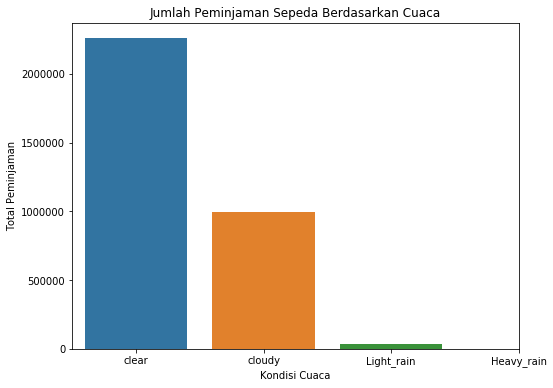

In [37]:

# Buat plot untuk weathersit_df (untuk mengetahui pengaruh cuaca terhadap jumlah peminjaman)
plt.figure(figsize=(8, 6))
sns.barplot(x='weathersit', y='cnt', data=weathersit_df)
plt.title('Jumlah Peminjaman Sepeda Berdasarkan Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Total Peminjaman')
# Mengubah label sumbu x
plt.xticks(ticks=[0, 1, 2, 3], labels=['clear', 'cloudy', 'Light_rain', 'Heavy_rain'])
plt.show()



In [38]:
# statistik temperatur berdasarkan musim
print(day_temp_season_df)

            temp                                    cnt
             max       min      mean       std      sum
season                                                 
1       0.572500  0.059130  0.297748  0.102735   471348
2       0.808333  0.253043  0.544405  0.122650   918589
3       0.861667  0.469167  0.706309  0.070848  1061129
4       0.657500  0.220833  0.422906  0.107834   841613


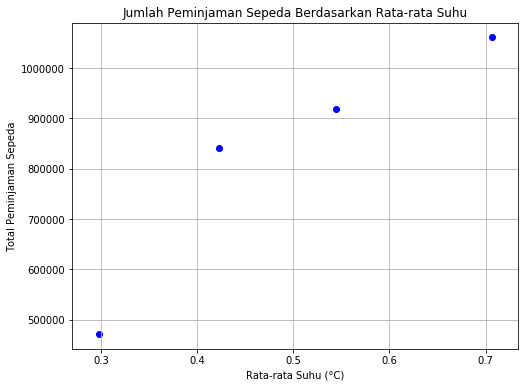

In [39]:
# Buat plot untuk day_temp_season_df (untuk mengetahui pengaruh suhu rata-rata 
# terhadap jumlah peminjaman)

import matplotlib.pyplot as plt

# Ambil data rata-rata suhu (temp['mean']) dan total peminjaman sepeda (cnt['sum'])
mean_temp = day_temp_season_df['temp']['mean']
total_rentals = day_temp_season_df['cnt']['sum']

# Buat scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(mean_temp, total_rentals, color='blue')
plt.title('Jumlah Peminjaman Sepeda Berdasarkan Rata-rata Suhu')
plt.xlabel('Rata-rata Suhu (°C)')
plt.ylabel('Total Peminjaman Sepeda')
plt.grid(True)

# Tampilkan plot
plt.show()



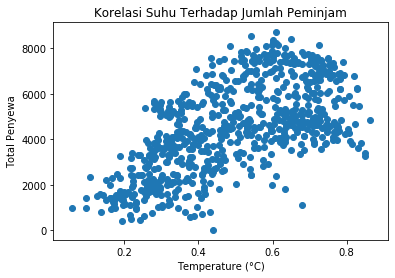

In [40]:
# Mencari korelasi suhu terhadap jumlah peminjaman
plt.scatter(day_df['temp'], day_df['cnt'])
plt.title('Korelasi Suhu Terhadap Jumlah Peminjam')
plt.xlabel('Temperature (°C)')
plt.ylabel('Total Penyewa')
plt.show()


#### Bagaimana Jumlah Peminjaman Berdasarkan Jam

In [41]:
jam_tertinggi_df.head(4)

,weekday,hr,cnt
0,0,13,374.933333
1,0,12,372.961905
2,0,14,363.628571
3,0,16,355.400000


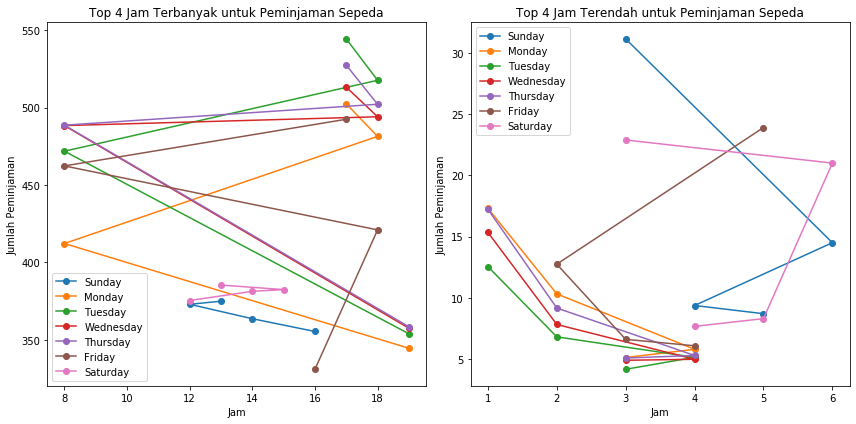

In [42]:
#Membuat Visualisai Jumlah Peminjaman terbanyak dan sedikit setiap harinya berdasarkan Jam
# Membuat dictionary untuk mapping nama hari
nama_hari = {
    0: 'Sunday',
    1: 'Monday',
    2: 'Tuesday',
    3: 'Wednesday',
    4: 'Thursday',
    5: 'Friday',
    6: 'Saturday'
}

# Visualisasi jam terbanyak
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)

for i in range(7):
    data = jam_tertinggi_df[jam_tertinggi_df['weekday'] == i]
    plt.plot(data['hr'], data['cnt'], 'o-', label=f'{nama_hari[i]}')

plt.title('Top 4 Jam Terbanyak untuk Peminjaman Sepeda')
plt.xlabel('Jam')
plt.ylabel('Jumlah Peminjaman')
plt.legend()

# Mengambil 4 jam terendah setiap harinya
jam_terendah_df = rata_rata_penggunaan_df.groupby('weekday', group_keys=False, sort=False).nsmallest(4).reset_index()

# Visualisasi jam terendah
plt.subplot(1, 2, 2)

for i in range(7):
    data = jam_terendah_df[jam_terendah_df['weekday'] == i]
    plt.plot(data['hr'], data['cnt'], 'o-', label=f'{nama_hari[i]}')

plt.title('Top 4 Jam Terendah untuk Peminjaman Sepeda')
plt.xlabel('Jam')
plt.ylabel('Jumlah Peminjaman')
plt.legend()

# Tampilkan plot
plt.tight_layout()
plt.show()


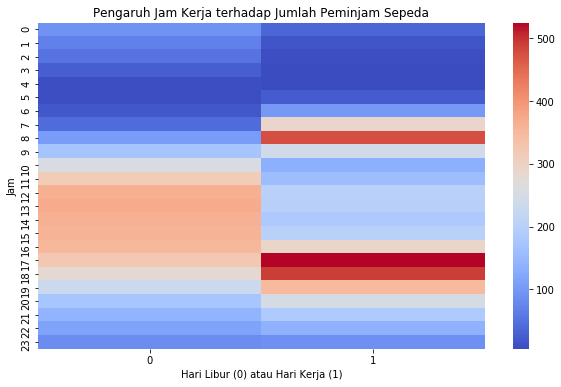

In [43]:
# Mengelompokkan berdasarkan 'hr' dan 'workingday', dan menghitung rata-rata peminjaman
pengaruh_jam_kerja = hour_df.groupby(['hr', 'workingday'])['cnt'].mean().reset_index()

# Membuat pivot table
pivot_table = pengaruh_jam_kerja.pivot(index='hr', columns='workingday', values='cnt')

# Visualisasi menggunakan heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, cmap='coolwarm')
plt.title('Pengaruh Jam Kerja terhadap Jumlah Peminjam Sepeda')
plt.xlabel('Hari Libur (0) atau Hari Kerja (1)')
plt.ylabel('Jam')
plt.show()

### Pertanyaan 2:  Berapa pengguna casual dan yang terdaftar berdasarkan hari?

In [44]:
# Mengelompokkan data berdasarkan weekday
weekday_df = day_df.groupby('weekday').agg({
    'cnt':['sum'],
    'registered':['sum'],
    'casual':['sum']
    
})


print(weekday_df)

            cnt registered  casual
            sum        sum     sum
weekday                           
0        444027     303506  140521
1        455503     384719   70784
2        469109     411266   57843
3        473048     415729   57319
4        485395     423935   61460
5        487790     409552   78238
6        477807     323955  153852


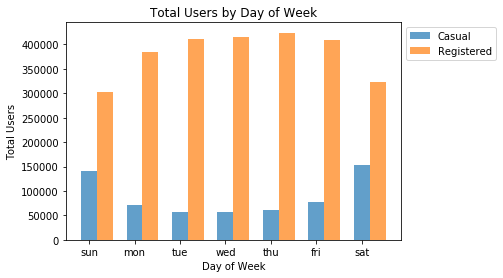

In [45]:
# Memilih data dari DataFrame
casual_data = weekday_df['casual']['sum']
registered_data = weekday_df['registered']['sum']
index = ['Not Working Day', 'Working Day']

# Mengatur lebar bar
bar_width = 0.35

# Menyiapkan posisi bar
bar_positions1 = range(len(casual_data))
bar_positions2 = [pos + bar_width for pos in bar_positions1]

# Membuat bar plot
plt.bar(bar_positions1, casual_data, width=bar_width, label='Casual', alpha=0.7)
plt.bar(bar_positions2, registered_data, width=bar_width, label='Registered', alpha=0.7)


# Menandai sumbu dan judul
plt.xlabel('Day of Week')
plt.ylabel('Total Users')
plt.title('Total Users by Day of Week')

# Menambahkan legenda
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Mengubah label sumbu x
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=['sun', 'mon', 'tue', 'wed', 'thu', 'fri', 'sat'])

# Menampilkan plot
plt.show()


In [46]:
# Mengelompokkan data berdasarkan working day
workingday_df = day_df.groupby('workingday').agg({
    'cnt':['sum'],
    'registered':['sum'],
    'casual':['sum']
    
})


print(workingday_df)

                cnt registered  casual
                sum        sum     sum
workingday                            
0           1000269     683537  316732
1           2292410    1989125  303285


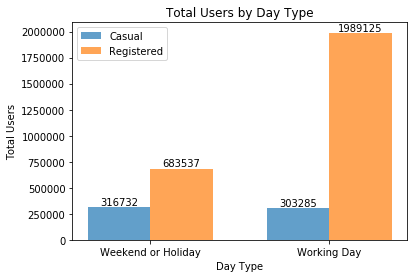

In [56]:

# Memilih data dari DataFrame
casual_data = workingday_df['casual']['sum']
registered_data = workingday_df['registered']['sum']
index = ['Weekend and Holiday', 'Working Day']

# Mengatur lebar bar
bar_width = 0.35

# Menyiapkan posisi bar
bar_positions1 = range(len(casual_data))
bar_positions2 = [pos + bar_width for pos in bar_positions1]

# Membuat bar plot
plt.bar(bar_positions1, casual_data, width=bar_width, label='Casual', alpha=0.7)
plt.bar(bar_positions2, registered_data, width=bar_width, label='Registered', alpha=0.7)

# Menambahkan angka pengguna pada bar
for i, data in enumerate(casual_data):
    plt.text(i, data + 100, str(data), ha='center', va='bottom', fontsize=10)

for i, data in enumerate(registered_data):
    plt.text(i + bar_width, data + 100, str(data), ha='center', va='bottom', fontsize=10)

# Menandai sumbu dan judul
plt.xlabel('Day Type')
plt.ylabel('Total Users')
plt.title('Total Users by Day Type')

# Menandai sumbu x
plt.xticks([pos + bar_width/2 for pos in bar_positions1], index)

# Menambahkan legenda
plt.legend()

# Menampilkan plot
plt.show()


### Trend Analysis :

In [48]:
# Mengelompokkan data berdasarkan bulan dan menghitung jumlah peminjaman setiap bulan
monthly_trend = day_df.resample('M', on='dteday')['cnt'].sum().reset_index()

# Merubah format 'dteday' menjadi bulan-tahun
monthly_trend['dteday'] = monthly_trend['dteday'].dt.strftime('%b-%Y')

monthly_trend.head(24)

,dteday,cnt
0,Jan-2011,38189
1,Feb-2011,48215
2,Mar-2011,64045
3,Apr-2011,94870
4,May-2011,135821
5,Jun-2011,143512
6,Jul-2011,141341
7,Aug-2011,136691
8,Sep-2011,127418
9,Oct-2011,123511


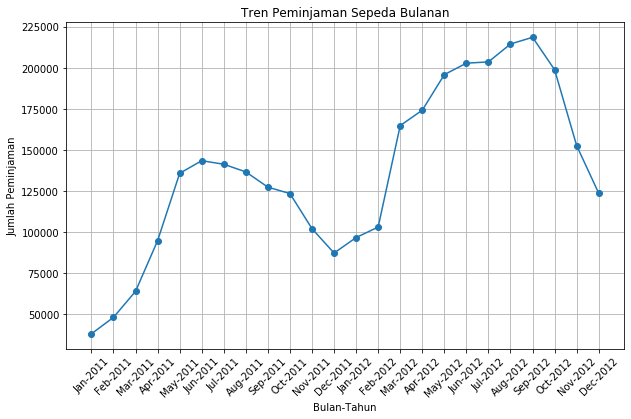

In [49]:
# Plot tren bulanan
plt.figure(figsize=(10, 6))
plt.plot(monthly_trend['dteday'], monthly_trend['cnt'], marker='o', linestyle='-')
plt.title('Tren Peminjaman Sepeda Bulanan')
plt.xlabel('Bulan-Tahun')
plt.ylabel('Jumlah Peminjaman')
plt.xticks(rotation=45)  # Rotasi label bulan-tahun
plt.grid(True)
plt.show()



In [58]:
# Mengelompokkan data berdasarkan minggu dan menghitung jumlah peminjaman setiap minggu
weekly_trend = day_df.resample('W-Mon', on='dteday').sum().reset_index()
weekly_trend.head(12)

,dteday,instant,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-03,6,0.904009,0.906769,1.939193,0.657294,582,2553,3135
1,2011-01-10,49,1.281993,1.312757,3.497266,1.457508,589,8791,9380
2,2011-01-17,98,1.308521,1.350333,3.814152,1.394720,750,7954,8704
3,2011-01-24,147,1.201051,1.239477,3.927083,1.481138,574,8612,9186
4,2011-01-31,196,1.433333,1.529841,4.937663,1.067323,578,7206,7784
5,2011-02-07,245,1.641268,1.733799,4.863858,1.071399,842,9642,10484
6,2011-02-14,294,1.643077,1.661003,3.353846,1.763432,1206,10187,11393
7,2011-02-21,343,2.529565,2.463924,2.960236,2.076738,2562,11324,13886
8,2011-02-28,392,2.097212,2.104821,4.504667,1.488336,1632,10820,12452
9,2011-03-07,441,2.084095,2.023254,4.202065,1.889868,1703,10465,12168


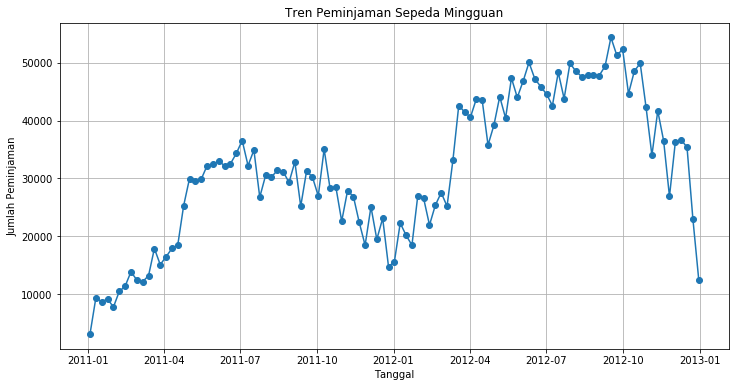

In [59]:
# Mengelompokkan data berdasarkan minggu dan menghitung jumlah peminjaman setiap minggu
weekly_trend = day_df.resample('W-Mon', on='dteday').sum().reset_index()

# Plot tren mingguan
plt.figure(figsize=(12, 6))
plt.plot(weekly_trend['dteday'], weekly_trend['cnt'], marker='o', linestyle='-')
plt.title('Tren Peminjaman Sepeda Mingguan')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Peminjaman')
plt.grid(True)
plt.show()



In [52]:
# Mengelompokkan data berdasarkan tahun dan menghitung total peminjaman
yearly_df = day_df.groupby('yr')['cnt'].sum().reset_index()

yearly_df.head()


,yr,cnt
0,0,1243103
1,1,2049576


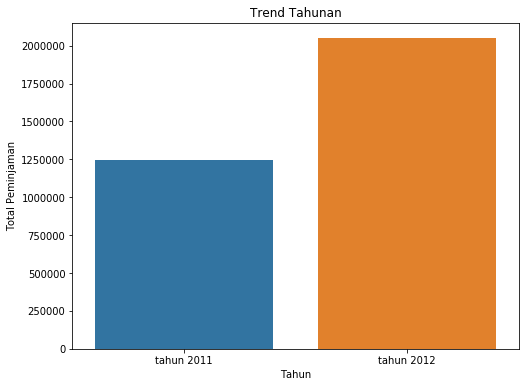

In [53]:
# Buat plot untuk yearly_df (untuk mengetahui jumlah peminjaman berdasarkan tahun)
plt.figure(figsize=(8, 6))
sns.barplot(x='yr', y='cnt', data=yearly_df)
plt.title('Trend Tahunan')
plt.xlabel('Tahun')
plt.ylabel('Total Peminjaman')

# Mengubah label sumbu x
plt.xticks(ticks=[0, 1], labels=['tahun 2011', 'tahun 2012'])

plt.show()


In [54]:
# Mengelompokkan data berdasarkan musim dan menghitung jumlah peminjaman setiap musim
seasonal_trend = hour_df.groupby('season')['cnt'].sum().reset_index()

seasonal_trend.head()

,season,cnt
0,1,471348
1,2,918589
2,3,1061129
3,4,841613


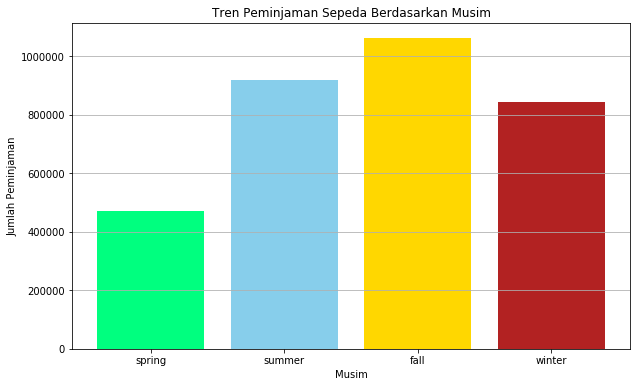

In [55]:
# Plot tren berdasarkan musim
plt.figure(figsize=(10, 6))
colors = ['springgreen', 'skyblue', 'gold', 'firebrick']
plt.bar(seasonal_trend['season'], seasonal_trend['cnt'], color=colors)
plt.title('Tren Peminjaman Sepeda Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Peminjaman')
plt.grid(True, axis='y')

# Mengubah label sumbu x
plt.xticks(ticks=[1, 2, 3, 4], labels=['spring', 'summer', 'fall', 'winter'])
plt.show()




## Conclusion

### Analisis trend
Berdasarkan trend tahunan jumlah penyewaan sepeda meningkat cukup tinggi dari tahun 2011 ke 2012, dapat disimpulkan bahwa sistem berbagi sepeda di Washington D.C. cukup populer. Tren jumlah penyewaan sepeda juga cenderung meningkat dari waktu ke waktu, yang menunjukkan bahwa sistem ini semakin diminati oleh masyarakat.

- Conclution pertanyaan 1 :  Bagaimana faktor-faktor seperti cuaca, suhu, dan waktu mempengaruhi jumlah sewa sepeda pada sistem berbagi sepeda?

Berdasarkan jumlah penyewaan sepeda yang lebih tinggi pada saat cuaca cerah dan suhu tinggi (hangat) serta kondisi kerja yg aktif telah mendorong orang untuk menggunakan sepeda.
ada korelasi positif antara suhu dan jumlah penyewaan sepeda. Semakin tinggi suhu, semakin banyak jumlah penyewaan sepeda.
 Pada hari kerja jumlah penyewa tertinggi terjadi pada pukul 17, 18, 8, 19, disore hari pukul 17 dan 18 dan 19 bisa diperkirakan adalah waktunya orang pulang kerja, sementara pukul 8 dipagi hari adalah waktu dimana orang mulai berangkat kerja.
 bila dilihat pada heatmap korelasinya terlihat kuat pada jam-jam tersebut dihari kerja, dan diluar jam tersebut korelasi lemah

- conclution pertanyaan 2: bagaimana perbandingan pengguna casual dan yang terdaftar pada saat hari libur dan hari kerja?
jumlah penyewa terdaftar selalu lebih banyak bila dibanding dengan penyeewa casual setiap harinya, hanya saja penyewa terdaftar akan mengalami penurunan pada saat hari sabtu dan minggu, sementara penyewa casual akan mengalami peningkatan pada hari-hari tersebut bila dibanding dengan hari kerja